In [1]:
#tHE Clothing Fashion-MNIST is a dataset of images from Zalando (Europe's biggest online fashion retailer)
# it consists of 60000 training samples and 10000 testing samples
# Each sample is a 28*28 grayscale image associated with a label from 10 classes
# http://yann.lecun.com/exdb/mnist/

10 classes are:


1.   T-shirt/top

1.   Trouser

1.   Pullover

1.   Dress

1.   Coat

1.   Sandal
2.   Shirt


2.   Sneaker


2.   bag


2.   Ankle Boot





In [3]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 2s 1us/step


In [5]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [6]:
# define classname
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(train_images.shape)

(60000, 28, 28)


In [8]:
print(test_images.shape)

(10000, 28, 28)


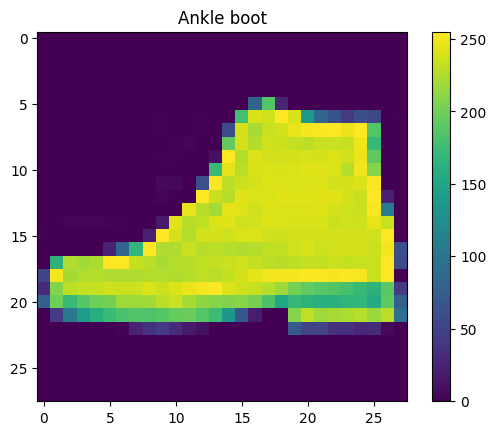

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()

In [10]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
train_images = train_images/255.0
test_images = test_images/255.0

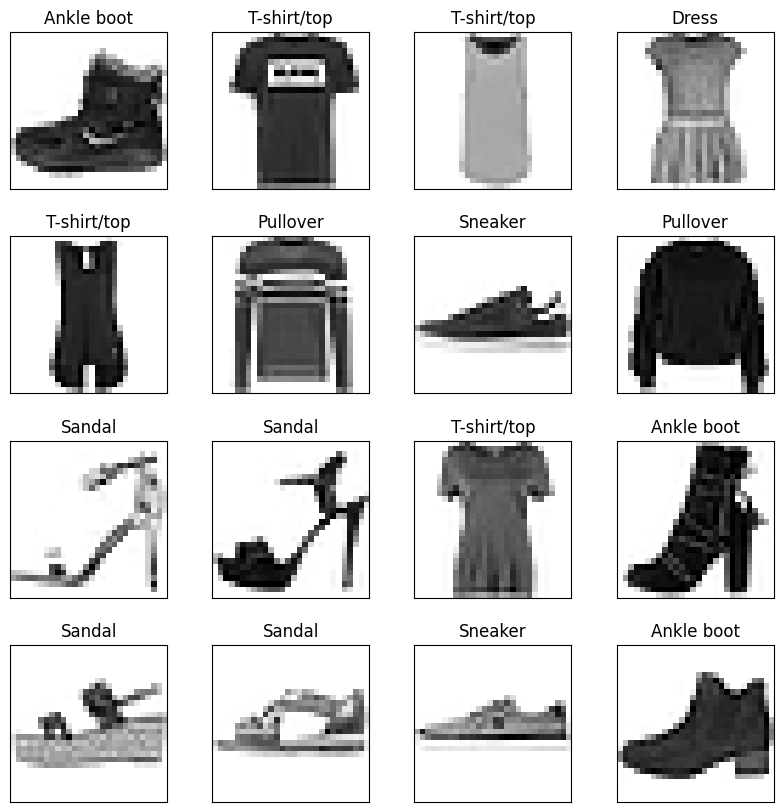

In [11]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

In [12]:
# Architecting CNN model
# The CNN has two main components: The feature extractor composed of a set of convolutional and pooling layers and the classifier backend similar to a regular neural network

In [13]:
# we need to reshape the data into 4-dimensions
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(X_train.shape)

(60000, 28, 28, 1)


The first dimension is the number of samples


---
The fourth dimension is the appended one representing the grayscale images


In [14]:
# random seed in tensorflow for reproducility
tf.random.set_seed(42)
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()
# add the first convolutional layers with 32 small-sized 3*3 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Convolutional layer is followed by a max-pooling layer with a 2*2 filter
model.add(layers.MaxPooling2D((2, 2)))
# second convolutional layer with 64 3*3 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# third convolutional layer with 128 3*3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#The resulting filter maps are flatten to provide features to the downstream classifier backend
model.add(layers.Flatten())
#Classifier backend 
model.add(layers.Dense(64, activation='relu'))
#output with 10 nodes demonstrating 10 classes
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

The benefits of applying pooling are:


1.   avoiding overfitting
2.   Reducing training cost



In [23]:
model.fit(X_train, train_labels, validation_split=0.15, epochs=10, batch_size= 256) # batch size is 32 by default
# model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=10) # batch size is 32 by default

Epoch 1/10
200/200 [==============================] - 11s 54ms/step - loss: 0.4112 - accuracy: 0.8522 - val_loss: 0.4464 - val_accuracy: 0.8352
Epoch 2/10
200/200 [==============================] - 11s 53ms/step - loss: 0.3601 - accuracy: 0.8704 - val_loss: 0.3442 - val_accuracy: 0.8760
Epoch 3/10
200/200 [==============================] - 11s 54ms/step - loss: 0.3251 - accuracy: 0.8824 - val_loss: 0.3320 - val_accuracy: 0.8800
Epoch 4/10
200/200 [==============================] - 12s 60ms/step - loss: 0.2995 - accuracy: 0.8911 - val_loss: 0.3158 - val_accuracy: 0.8849
Epoch 5/10
200/200 [==============================] - 12s 60ms/step - loss: 0.2785 - accuracy: 0.8983 - val_loss: 0.2950 - val_accuracy: 0.8948
Epoch 6/10
200/200 [==============================] - 12s 60ms/step - loss: 0.2631 - accuracy: 0.9034 - val_loss: 0.2848 - val_accuracy: 0.8982
Epoch 7/10
200/200 [==============================] - 12s 61ms/step - loss: 0.2486 - accuracy: 0.9100 - val_loss: 0.2808 - val_accuracy:

In [24]:
# 96% on training set and 91% on the testing set
# double check the performance
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 1s - loss: 0.2812 - accuracy: 0.9031 - 1s/epoch - 4ms/step
Accuracy on test set:  0.9031000137329102


In [25]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [26]:
print(predictions[0])

[4.1868147e-06 1.3862094e-09 5.1785971e-08 1.2561253e-09 4.2657189e-07
 8.0255093e-05 4.1755558e-07 2.0559111e-03 8.0927435e-07 9.9785787e-01]


In [27]:
import numpy as np

print('Predicted label for the first test sample: ', np.argmax(predictions[0]))

Predicted label for the first test sample:  9


In [28]:
print('True label for the first test sample: ', test_labels[0])

True label for the first test sample:  9


In [29]:
def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()

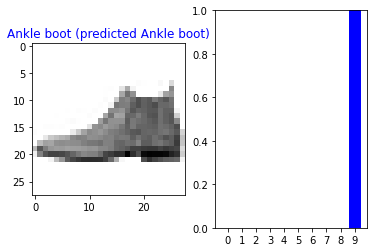

In [28]:
plot_image_prediction(0, test_images, predictions, test_labels, class_names)

In [34]:
model.layers[2].get_weights()[0].shape

(3, 3, 32, 64)

In [30]:
# 
filters, _ = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max-f_min)

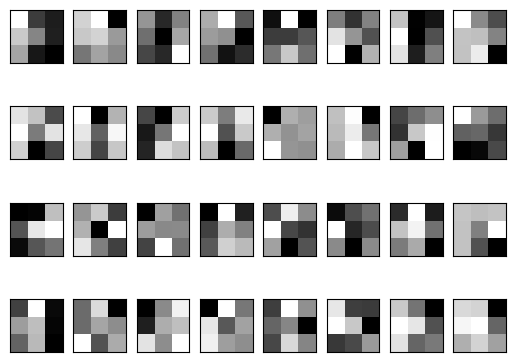

In [38]:
n_filters = 32
for i in range(n_filters):
  filter = filters[:, :, :, i]
  plt.subplot(4, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(filter[:, :, 0], cmap='gray')

plt.show()

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
n_small = 500
X_train = X_train[:n_small]
train_labels = train_labels[:n_small]
print(X_train.shape)

(500, 28, 28, 1)


In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [41]:
model.compile(optimizer='adam',
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [42]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=20, batch_size=40)

Epoch 1/20
13/13 [==============================] - 1s 95ms/step - loss: 2.0077 - accuracy: 0.3460 - val_loss: 1.5921 - val_accuracy: 0.4026
Epoch 2/20
13/13 [==============================] - 1s 85ms/step - loss: 1.3191 - accuracy: 0.5080 - val_loss: 1.2754 - val_accuracy: 0.5584
Epoch 3/20
13/13 [==============================] - 1s 86ms/step - loss: 1.0695 - accuracy: 0.6300 - val_loss: 0.9955 - val_accuracy: 0.6783
Epoch 4/20
13/13 [==============================] - 1s 94ms/step - loss: 0.8714 - accuracy: 0.7160 - val_loss: 0.9111 - val_accuracy: 0.6756
Epoch 5/20
13/13 [==============================] - 1s 91ms/step - loss: 0.7347 - accuracy: 0.7500 - val_loss: 0.8581 - val_accuracy: 0.7055
Epoch 6/20
13/13 [==============================] - 1s 90ms/step - loss: 0.6639 - accuracy: 0.8020 - val_loss: 0.7784 - val_accuracy: 0.7410
Epoch 7/20
13/13 [==============================] - 1s 89ms/step - loss: 0.5826 - accuracy: 0.8000 - val_loss: 0.7503 - val_accuracy: 0.7479
Epoch 8/20
13

In [43]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set:', test_acc)

313/313 - 1s - loss: 0.7113 - accuracy: 0.7904 - 1s/epoch - 4ms/step
Accuracy on test set: 0.7904000282287598


The accuracy  without augmentation has a classification accuracy of 79.5%

In [ ]:
datagen = ImageDataGenerator(height_shift_range=3,
                              horizontal_flip=True
                              )


In [45]:
model_aug = tf.keras.models.clone_model(model)

In [46]:
model_aug.compile(optimizer='adam',
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [47]:
train_generator = datagen.flow(X_train, train_labels, seed=42, batch_size=40)

model_aug.fit(train_generator, epochs=50, validation_data=(X_test, test_labels))

Epoch 1/50
13/13 [==============================] - 2s 104ms/step - loss: 1.9802 - accuracy: 0.2340 - val_loss: 1.5475 - val_accuracy: 0.4513
Epoch 2/50
13/13 [==============================] - 1s 98ms/step - loss: 1.2327 - accuracy: 0.5740 - val_loss: 1.0432 - val_accuracy: 0.6183
Epoch 3/50
13/13 [==============================] - 1s 105ms/step - loss: 0.9584 - accuracy: 0.6580 - val_loss: 0.8750 - val_accuracy: 0.7036
Epoch 4/50
13/13 [==============================] - 1s 103ms/step - loss: 0.8383 - accuracy: 0.6960 - val_loss: 0.9017 - val_accuracy: 0.6791
Epoch 5/50
13/13 [==============================] - 1s 103ms/step - loss: 0.7429 - accuracy: 0.7640 - val_loss: 0.8365 - val_accuracy: 0.6970
Epoch 6/50
13/13 [==============================] - 1s 105ms/step - loss: 0.6534 - accuracy: 0.7960 - val_loss: 0.7386 - val_accuracy: 0.7433
Epoch 7/50
13/13 [==============================] - 1s 103ms/step - loss: 0.6288 - accuracy: 0.7920 - val_loss: 0.7628 - val_accuracy: 0.7306
Epoch 8

In [48]:
test_loss, test_acc = model_aug.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 1s - loss: 1.0428 - accuracy: 0.7908 - 1s/epoch - 3ms/step
Accuracy on test set:  0.7907999753952026
